<br>
<body>
    <p style="font-size:70px;text-align:center; color:#0070AD"><b>Hackathon 2023</b></p>
    <center><img src="./src/figures/mines_invent_logo.png" style="width:80%;height:auto"></center>
    <p style="font-size:55px;text-align:center; color:#12ABDB">Welcoming Notebook</p>
</body>
<br>

<br>
<p style="font-size:30px;color:#0070AD">Challenge Background </p>
<br>

<p style="text-align: justify">Since the signing of the Kyoto Protocol in 1997, the reduction of greenhouse gases and in particular CO$_2$ emissions has become a major issue for all private and public actors. This is a key point if we hope to meet the objectives of the 2015 Paris Conference on Global Warming (COP21) to limit global warming between 1.5°C and 2°C.</p>

<p style="text-align: justify">In this context, many companies take into account ESG (Environmental Social Governance) criteria in their long-term investment strategy to quantify the impact of the company's actions on the environment and society.</p>

<br>
<p style="font-size:30px;color:#0070AD">Challenge goals </p>
<br>

<p style="text-align: justify">A client wishing to improve the consideration of ESG criteria for his company calls on you to estimate the carbon emissions of the vehicles used by his employees to come to their workplace. Aware that it is necessary to take into account the carbon impact of its employees, the client would like you to provide a model capable of quickly estimating the carbon emission of a vehicle based on images from a video surveillance of the company's parking lot.</p>

<p style="text-align: justify">The images available contain only one vehicle and for each one the coordinates of a box locating the vehicle in the image are given.</p>

<p style="text-align: justify">Your model has to return as outputs the four coordinates of the box locating the vehicle and the vehicle's CO$_2$ carbon emission. Indeed given an image i containing a car, the output of the global model is as follows :</p>
    
<br>
<center>
    $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i},\hat{e}^{carbone}_{i})$
</center>
<br>  

Where : 
- $\hat{x}^{min}_{i}, \hat{y}^{min}_{i}$ predicted coordinates of top left corner of the box locating the vehicle.
- $\hat{x}^{max}_{i}, \hat{y}^{max}_{i}$ predicted coordinates of the bottom right corner of the box locating the vehicle.
    
To assess the results, we compute the following metric :</p>

<br>
<center>
    $\frac{1}{n}\sum_{i=1}^{n}{0.7\cdot{(1-IoU_i)} + 0.3\cdot\frac{\lvert e_i^{carbone} - \hat{e_i}^{carbone} \rvert}{e_i^{carbone}}}$
</center>

<br>
Where : 

- $IoU_i$ is the Intersection Over Union for the ith image
- $e_i^{carbone}$ the real carbon emission of the ith vehicle
- $\hat{e_i}^{carbone}$ the predicted carbon emission of the ith vehicle 

<p style="text-align: justify">Given four predicted coordinates $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i})$ and the four true coordinates $(x^{min}_{i}, x^{max}_{i}, y^{min}_{i}, y^{max}_{i})$ of the box locating a vehicle in an image, here are the steps to calculate the $IoU$.</p>

<p style="text-align: justify">First we calculate the top left and the bottom right corner of the intersection :</p>
<br>
<center>
    $x_{inter_{1}} = max(x^{min}_{i},\hat{x}^{min}_{i})$
</center>
<center>
    $x_{inter_{2}} = min(x^{max}_{i},\hat{x}^{max}_{i})$
</center>
<center>
    $y_{inter_{1}} = max(y^{min}_{i},\hat{y}^{min}_{i})$
</center>
<center>
    $y_{inter_{2}} = min(y^{max}_{i},\hat{y}^{max}_{i})$
</center>

<p style="text-align: justify">Then we calculate the area of the intersection :</p>
<center>
    $width\_inter = x_{inter_{1}} - x_{inter_{2}}$
</center>
<center>
    $height\_inter = y_{inter_{1}} - y_{inter_{2}}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_inter = height\_inter\cdot{width\_inter}$
</center>

<p style="text-align: justify">Then we calculate the area of each box :</p>
<center>
    $width\_box1 = \hat{x}^{max}_{i}-\hat{x}^{min}_{i}$
</center>
<center>
    $height\_box1 = \hat{y}^{max}_{i}-\hat{y}^{min}_{i}$
</center>
<center>
    $width\_box2 = x^{max}_{i}-x^{min}_{i}$
</center>
<center>
    $height\_box2 = y^{max}_{i}-y^{min}_{i}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_box1 = width\_box1\cdot{height\_box1}$
</center>
<center>
    $area\_box2 = width\_box2\cdot{height\_box2}$
</center>

<p style="text-align: justify">Finally we calculate the $IoU$:</p>
<center>
    $area\_union = area\_box1 + area\_box2 - area\_inter$
</center>
<p style="text-align: justify"></p>
<center>
    $IoU = \frac{area\_inter}{area\_union}$
</center>

<br>
<p style="font-size:30px;color:#0070AD">Data Description </p>
<br>

<p style="text-align: justify">The client has provided you with different data to answer the problem :</p>

<ul>
  <li><b>2653</b> images contained in the folder train.</li>
    <li>a csv file named <b>_annotation.csv</b> in the folder train_annotation with several variables :</li>
    <ul>
        <li><b>im_name</b>: image name.</li>
        <li><b>x_min</b>: the x coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>x_max</b>: the x coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>y_min</b>: the y coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>y_max</b>: the y coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>class</b>: What is the object inside the box.</li>
    </ul>
</ul>

<br>
<p style="font-size:30px;color:#0070AD">Deliverables </p>
<br>

<p style="text-align: justify">As part of this challenge, the client expects two deliverables from you : 
    <ul>
        <li> A scientific procedure document presenting the proposed approach and the results obtained regarding the metric presented above. You will find a template here.</li>
        <li>A pitch presenting your solution, its advantages, its feasibility to your client.</li>
    </ul>
</p>

<br>
<p style="font-size:30px;color:#0070AD">Challenge evaluation </p>
<br>

<p style="text-align: justify">Based on your deliverables, you are evaluated on 5 final criteria by a jury :</p>
<ul>
    <li><b>Model Performance</b> : The solution delivers a satisfactory score for the metric used.</li>
    <li><b>Innovation</b> : Your ability to surprise the jury with the format of the pitch or the presentation of the scientific procedure document.</li>
    <li><b>Scientific approach</b> : Clarity, rigor, justification and relevance of your scientific approach. This criteria is evaluated on the scientific procedure document.</li>
    <li><b>Interdisciplinarity</b> : Your ability to collaborate, organize your team, the diversity of member schools and your ability to include different competences in a project. This criteria is evaluated on the scientific document procedure and the final pitch.</li>
    <li><b>Best Business opportunity</b> : Your ability to present your solution well, whether it is on the strategy of valorization, how it fits in an ecological approach, the gestures during the presentation and your capacity of persuasion. This criteria is evaluated on the final pitch</li>
</ul>    
<br>
<p style="font-size:30px;color:#0070AD">Benchmark</p>
<br>

<p style="text-align: justify"> A first naive method to predict the different bounded box is to estimate it using the average of each variable <b>x_min</b>, <b>y_min</b>, <b>x_max</b> and <b>y_max</b> measured for each bounded box, this will serve as a benchmark for the bounded box predictions. Then, we simply randomly assign the CO2 consumption of car models for each image.</p>

<p style="text-align: justify"> The proposed solution does not constitute a solution to be adopted to solve the challenge. It is presented to show you an example of a submission that meets the requirements.</p>

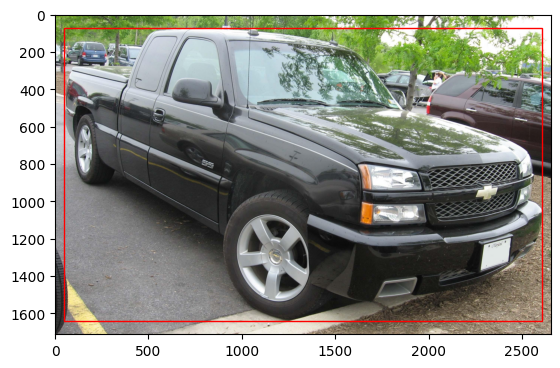

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras.backend as K
path_annotrain = "../datasets_train/train_annotation/_annotation.csv"

train_annotation = pd.read_csv(path_annotrain, index_col=0)

bbox_train_full = train_annotation.loc[
    :, ["im_name", "x_min", "y_min", "x_max", "y_max"]
]

im_test = bbox_train_full.iloc[124, 0]
x1, y1, x2, y2 = bbox_train_full.loc[bbox_train_full["im_name"] == im_test].iloc[0, 1:]


def load_plot(im_name, x1, y1, x2, y2):

    im = np.asanyarray(Image.open(f"../datasets_train/train/{im_name}"))

    # Display the image
    plt.imshow(im)

    # Get the current reference
    ax = plt.gca()

    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()


load_plot(im_test, x1, y1, x2, y2)

In [2]:
# Pipeline drop NaN value, but need to preprocess the missing value
bbox_train_full = bbox_train_full.dropna(how = 'any')
bbox_train_full

,im_name,x_min,y_min,x_max,y_max
985,107347968.jpg,40.0,244.0,1144.0,637.0
911,91160576.jpg,4.0,9.0,98.0,76.0
2084,273809408.jpg,16.0,4.0,288.0,191.0
4225,579534848.jpg,14.0,23.0,255.0,178.0
7179,950599680.jpg,4.0,70.0,321.0,215.0
...,...,...,...,...,...
2689,376438784.jpg,37.0,32.0,595.0,434.0
7176,950403072.jpg,189.0,216.0,488.0,374.0
3451,509083648.jpg,30.0,100.0,739.0,506.0
1518,147456000.jpg,124.0,207.0,1180.0,652.0


<li> Splitting the data into train eval set</li>

In [4]:
from sklearn.model_selection import train_test_split

bbox_train, bbox_eval = train_test_split(
    bbox_train_full, test_size=0.2, random_state=1234
)

print(bbox_train.shape)
print(bbox_eval.shape)

(1675, 5)
(419, 5)


<li> Bounding box identification</li>

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class DataPreprocessor:
    # Write your code to preprocess the data

    #-----------------------------Sample Code ( to be deleted ) -------------------------------
    def __init__(self, target_size=(512, 512)):
        self.target_size = target_size
    
    def preprocess_data(self, bbox_data, image_path):
        X = []  # List to store the preprocessed images
        y = []  # List to store the target labels (IOU-based bounding boxes)

        for idx, row in bbox_data.iterrows():
            im_name, x1, y1, x2, y2 = row
            im = load_img(f"{image_path}/{im_name}", target_size=self.target_size)
            im = img_to_array(im) / 255.0  # Normalize the image pixels to [0, 1]
            X.append(im)

            # Calculate scaling factors for bounding box coordinates
            orig_width, orig_height = load_img(f"{image_path}/{im_name}").size
            scale_x = self.target_size[0] / orig_width
            scale_y = self.target_size[1] / orig_height

            # Resize and scale bounding box coordinates
            x1_scaled = x1 * scale_x
            y1_scaled = y1 * scale_y
            x2_scaled = x2 * scale_x
            y2_scaled = y2 * scale_y

            target_label = [x1_scaled, y1_scaled, x2_scaled, y2_scaled]
            y.append(target_label)

        return np.array(X), np.array(y)

# Load and preprocess the data using the class
image_path = "../datasets_train/train"
preprocessor = DataPreprocessor(target_size=(512, 512))
X_train, y_train = preprocessor.preprocess_data(bbox_train_full, image_path)

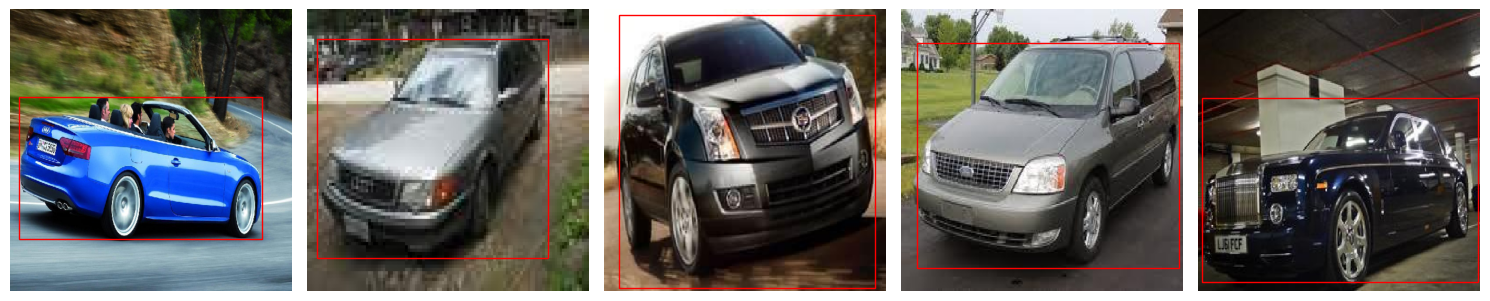

In [11]:
images = X_train[:5]  # Displaying the first 5 images
bbox_coords_list = y_train[:5]  # Bounding box coordinates for the first 5 images

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot images with bounding boxes
for i, (image, bbox_coords) in enumerate(zip(images, bbox_coords_list)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(image)
    ax = plt.gca()
    rect = plt.Rectangle((bbox_coords[0], bbox_coords[1]), bbox_coords[2] - bbox_coords[0], bbox_coords[3] - bbox_coords[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf

def iou(y_true, y_pred):
    # Write your code for IOU function

    #-----------------------------Sample Code ( to be deleted ) -------------------------------
    # Compute the intersection coordinates
    xi1 = tf.maximum(y_true[:, 0], y_pred[:, 0])
    yi1 = tf.maximum(y_true[:, 1], y_pred[:, 1])
    xi2 = tf.minimum(y_true[:, 2], y_pred[:, 2])
    yi2 = tf.minimum(y_true[:, 3], y_pred[:, 3])

    # Calculate the area of intersection
    intersection_area = tf.maximum(xi2 - xi1, 0) * tf.maximum(yi2 - yi1, 0)

    # Calculate the areas of both bounding boxes
    true_area = (y_true[:, 2] - y_true[:, 0]) * (y_true[:, 3] - y_true[:, 1])
    pred_area = (y_pred[:, 2] - y_pred[:, 0]) * (y_pred[:, 3] - y_pred[:, 1])

    # Calculate the union area
    union_area = true_area + pred_area - intersection_area

    # Avoid division by zero
    epsilon = 1e-6
    iou = intersection_area / (union_area + epsilon)

    return iou


In [ ]:
# Define your own model
def create_cnn_model(input_shape):
    # Write your code for your bounding box prediction model 
    
    #-----------------------------Sample Code ( to be deleted ) -------------------------------
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='sigmoid'))  # 4 units for x1, y1, x2, y2
    return model

In [ ]:
# Define the input shape for the CNN model
input_shape = X_train.shape[1:]

# Create the CNN model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[iou])

# Train the model
batch_size = 32
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

<li> Car model identification</li>


In [12]:
class BoundingBoxPreprocessor:
    # Write your code to apply your bounding box prediction on the images

    #-----------------------------Sample Code ( to be deleted ) -------------------------------
    def __init__(self, target_shape=(256, 256, 3)):
        self.target_shape = target_shape
        self.label_encoder = LabelEncoder()

    def resize_image(self, im_name):
        try:
            im = Image.open(f"../datasets_train/train/{im_name}")
        except FileNotFoundError:
            return None

        im_rgb = im.convert("RGB")  # Convert to RGB format (3 channels) if grayscale
        im_resized = im_rgb.resize((self.target_shape[1], self.target_shape[0]))
        return np.array(im_resized)
        
    #use your own bounding box prediction
    def process_data(self, bbox_train_full, train_annotation):
        # Resize the images and store bounding boxes in a new DataFrame
        resized_bbox_list = []
        for idx, row in bbox_train_full.iterrows():
            im_name = row["im_name"]
            x1, y1, x2, y2 = row[1:]
            im_resized = self.resize_image(im_name)

            if im_resized is None:
                continue

            resized_bbox_list.append([im_name, x1, y1, x2, y2])

        bbox_resized = pd.DataFrame(resized_bbox_list, columns=["im_name", "x1", "y1", "x2", "y2"])

        # Merge the resized bounding boxes with the original train_annotation DataFrame
        train_annotation_resized = pd.merge(
            bbox_resized, train_annotation.drop(columns=["x_min", "y_min", "x_max", "y_max"]), on="im_name"
        )

        # Encode the car model information into numerical labels
        train_annotation_resized["model_label"] = self.label_encoder.fit_transform(train_annotation_resized["models"])

        # Split the data into training and evaluation sets
        bbox_train, bbox_eval = train_test_split(train_annotation_resized, test_size=0.2, random_state=1234)

        # Prepare the data for the CNN model
        X_train = np.stack(bbox_train["im_name"].apply(lambda x: self.resize_image(x)))
        y_train = bbox_train["model_label"].values

        X_eval = np.stack(bbox_eval["im_name"].apply(lambda x: self.resize_image(x)))
        y_eval = bbox_eval["model_label"].values

        # Normalize the image data to values between 0 and 1
        X_train = X_train.astype("float32") / 255.0
        X_eval = X_eval.astype("float32") / 255.0

        return X_train, y_train, X_eval, y_eval

# Example usage for data processing
preprocessor = BoundingBoxPreprocessor(target_shape=(256, 256, 3))
X_train, y_train, X_eval, y_eval = preprocessor.process_data(bbox_train_full, train_annotation)

In [13]:
# Define your own model
def create_model_pred_model(input_shape, num_classes):
    # Write your code for your bounding box prediction model 
    
    #-----------------------------Sample Code ( to be deleted ) -------------------------------
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    return model
num_classes = len(preprocessor.label_encoder.classes_)

# Create the model using the function
input_shape = (256, 256, 3)
model = create_model_pred_model(input_shape, num_classes)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 128)               66064512  
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                        

In [71]:

# Compile the improved model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the improved model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_eval, y_eval))

# Evaluate the improved model
loss, accuracy = model.evaluate(X_eval, y_eval)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
53/53 [==============================] - 88s 2s/step - loss: 15.7990 - accuracy: 0.0120 - val_loss: 4.6072 - val_accuracy: 0.0120
Epoch 2/10
53/53 [==============================] - 82s 2s/step - loss: 4.6002 - accuracy: 0.0186 - val_loss: 4.6063 - val_accuracy: 0.0144
Epoch 3/10
53/53 [==============================] - 85s 2s/step - loss: 4.5931 - accuracy: 0.0180 - val_loss: 4.6076 - val_accuracy: 0.0072
Epoch 4/10
53/53 [==============================] - 81s 2s/step - loss: 4.5793 - accuracy: 0.0197 - val_loss: 4.6053 - val_accuracy: 0.0048
Epoch 5/10
53/53 [==============================] - 79s 1s/step - loss: 4.5269 - accuracy: 0.0215 - val_loss: 4.6130 - val_accuracy: 0.0120
Epoch 6/10
53/53 [==============================] - 79s 1s/step - loss: 4.3526 - accuracy: 0.0485 - val_loss: 4.6718 - val_accuracy: 0.0144
Epoch 7/10
53/53 [==============================] - 77s 1s/step - loss: 3.8629 - accuracy: 0.1269 - val_loss: 4.7790 - val_accuracy: 0.0215
Epoch 8/10
53/53 [=

<li> Trained model on Test set</li>

In [72]:
path_annotrain = "../datasets_test/test_annotation/_annotation.csv"
target_shape = (256,256,3)
test_annotation = pd.read_csv(path_annotrain, index_col=0)

 # Write your code to apply your trained model on test set
    
#-----------------------------Sample Code ( to be deleted ) -------------------------------

# Extract the bounding box information from the test annotations
bbox_test_full = test_annotation.loc[:, ["im_name", "x_min", "y_min", "x_max", "y_max"]]
def resize_test_image(im_name, target_shape):
    im = Image.open(f"../datasets_test/test/{im_name}")
    im_rgb = im.convert("RGB")  # Convert to RGB format (3 channels) if grayscale
    im_resized = im_rgb.resize((target_shape[1], target_shape[0]))  # (width, height) for PIL resize
    return np.array(im_resized)
# Resize the bounding boxes and store them in a new DataFrame
resized_bbox_test_list = []
for idx, row in bbox_test_full.iterrows():
    im_name = row["im_name"]
    x1, y1, x2, y2 = row[1:]
    im_resized = resize_test_image(im_name, target_shape)

    # Check if resize_test_image returned None (due to missing image), then skip this image
    if im_resized is None:
        continue

    resized_bbox_test_list.append([im_name, x1, y1, x2, y2])

bbox_test_resized = pd.DataFrame(resized_bbox_test_list, columns=["im_name", "x1", "y1", "x2", "y2"])

# Merge the resized bounding boxes with the original test_annotation DataFrame
test_annotation_resized = pd.merge(bbox_test_resized, test_annotation.drop(columns=["x_min", "y_min", "x_max", "y_max"]), on="im_name")

# Use the same LabelEncoder from training on the test data
test_annotation_resized["model_label"] = preprocessor.label_encoder.transform(test_annotation_resized["models"])

# Prepare the test data for the CNN model
X_test = np.stack(test_annotation_resized["im_name"].apply(lambda x: resize_test_image(x, target_shape)))
y_test = test_annotation_resized["model_label"].values

# Normalize the test image data to values between 0 and 1
X_test = X_test.astype("float32") / 255.0

# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

41/41 [==============================] - 10s 244ms/step - loss: 7.2554 - accuracy: 0.0249
Test accuracy: 2.49%


In [74]:
img = X_test[0]
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(y_test[0], 100 * np.max(score))
)

1/1 [==============================] - 0s 67ms/step
This image most likely belongs to 96 with a 2.00 percent confidence.


---------------------------------------------------------To be continued-------------------------------------------------------------


<li> Implementation of the naive method and evaluation on an evaluation image.</li>

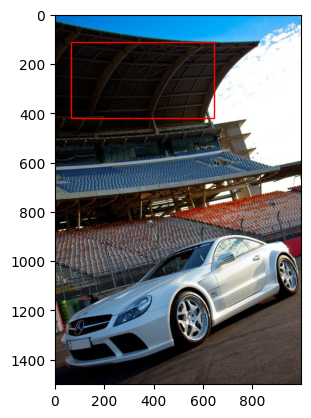

In [8]:
eval_pred = bbox_eval.copy()

# naive predictions for the bounded box
eval_pred["x_min"] = np.mean(bbox_train["x_min"])
eval_pred["x_max"] = np.mean(bbox_train["x_max"])
eval_pred["y_min"] = np.mean(bbox_train["y_min"])
eval_pred["y_max"] = np.mean(bbox_train["y_max"])

# test on the first image
im_pred_test = eval_pred.iloc[2, 0]
x1, y1, x2, y2 = eval_pred.loc[eval_pred["im_name"] == im_pred_test].iloc[0, 1:]

load_plot(im_pred_test, x1, y1, x2, y2)

<li>Random assignment of car models</li>

In [ ]:
cars_path = "../car_models_footprint.csv"
car_models = pd.read_csv(cars_path, sep=";")

# randomly assign CO2 consumption of car models
np.random.seed(1234)

emission = car_models["Average of CO2 (g per km)"].dropna()
eval_pred["e"] = eval_pred["x_min"].apply(lambda x: np.random.choice(emission, 1)[0])

<li>Submission of the results taking care to respect the name of the columns and deleting the index on export. Please <b>refer the right submission path</b> of your group for the hackathon by replacing xxxxx in the path given.</li>

In [ ]:
# Submit the results
eval_pred.to_csv(
    "../../group_xxxxx_shared_workspace/submissions/test_team.csv", index=False
)  # xxxx for your Hfactory ID group